In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

'C:\\Users\\meebh\\jupyter\\Predict_loan_eligibility_for_dream_housing_finance_company'

In [3]:
data= pd.read_csv('train.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [5]:
data.isnull().sum()/data.shape[0]*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
## very less %age of missing value. hence we can ignore these missing value in features. 

In [6]:
data[data.isnull().any(axis=1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [7]:
data= data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [9]:
data.Loan_Status.value_counts()/data.shape[0]*100

Y    69.166667
N    30.833333
Name: Loan_Status, dtype: float64

In [ ]:
# dataset is highly imbalanced.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

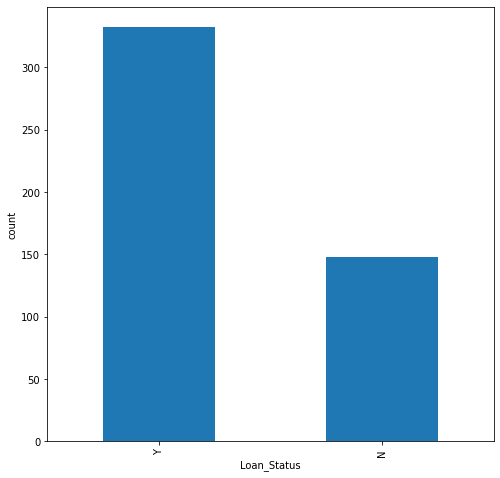

In [12]:
data.Loan_Status.value_counts().plot(kind='bar',figsize=(8,8))
plt.xlabel('Loan_Status')
plt.ylabel('count')
plt.show()

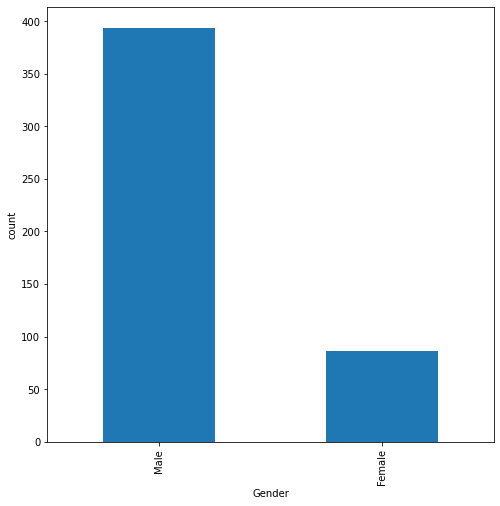

In [13]:
data.Gender.value_counts().plot(kind='bar',figsize=(8,8))
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

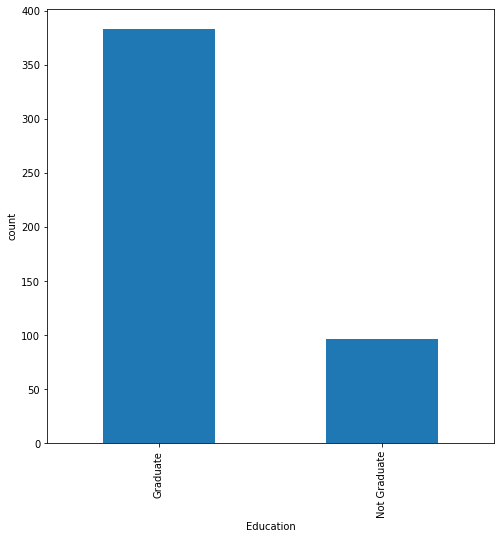

In [14]:
data.Education.value_counts().plot(kind='bar',figsize=(8,8))
plt.xlabel('Education')
plt.ylabel('count')
plt.show()

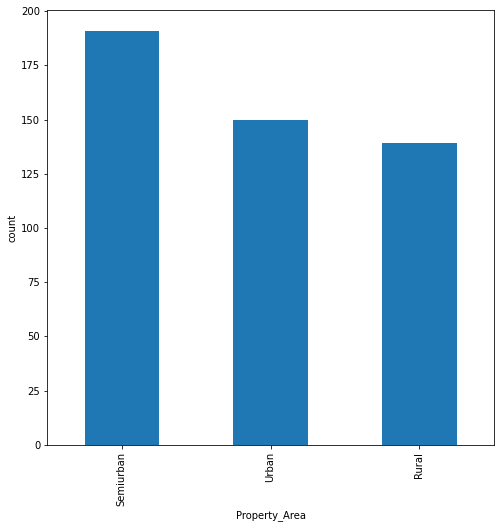

In [15]:
data.Property_Area.value_counts().plot(kind='bar',figsize=(8,8))
plt.xlabel('Property_Area')
plt.ylabel('count')
plt.show()

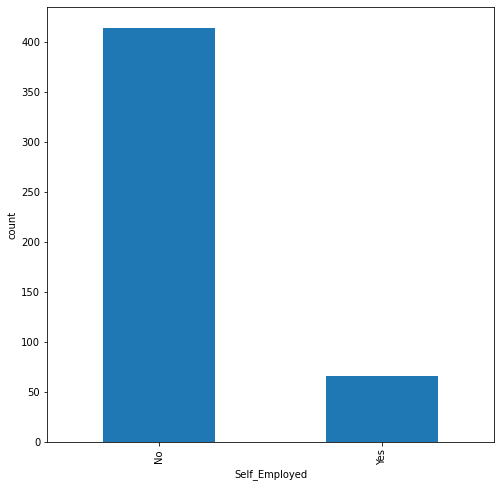

In [16]:
data.Self_Employed.value_counts().plot(kind='bar',figsize=(8,8))
plt.xlabel('Self_Employed')
plt.ylabel('count')
plt.show()

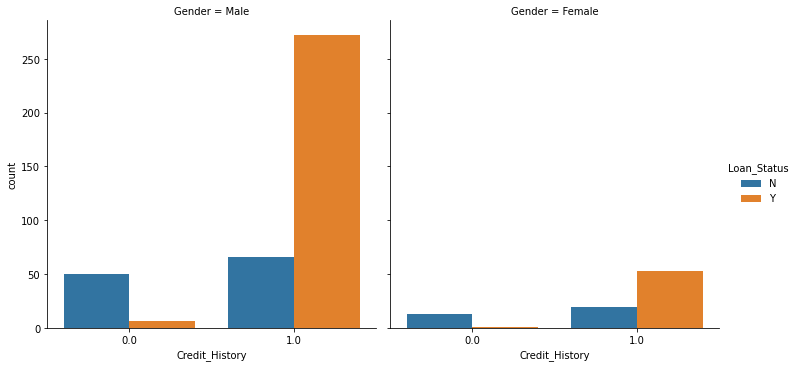

In [17]:
sns.catplot(x='Credit_History', data= data, kind='count',hue= 'Loan_Status',col= 'Gender')
plt.show()

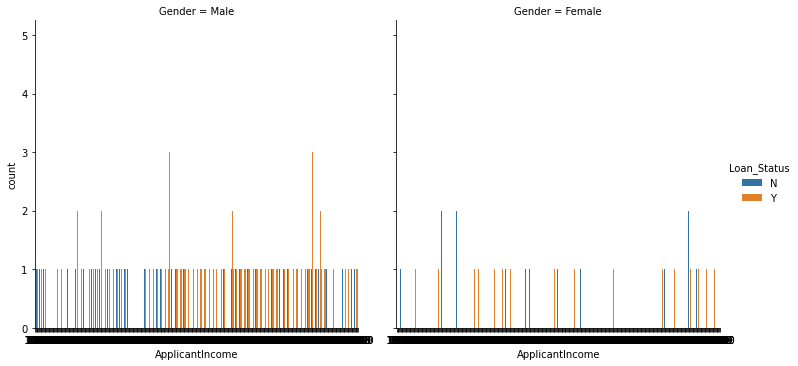

In [18]:
sns.catplot(x='ApplicantIncome', data= data, kind='count',hue= 'Loan_Status',col= 'Gender')
plt.show()

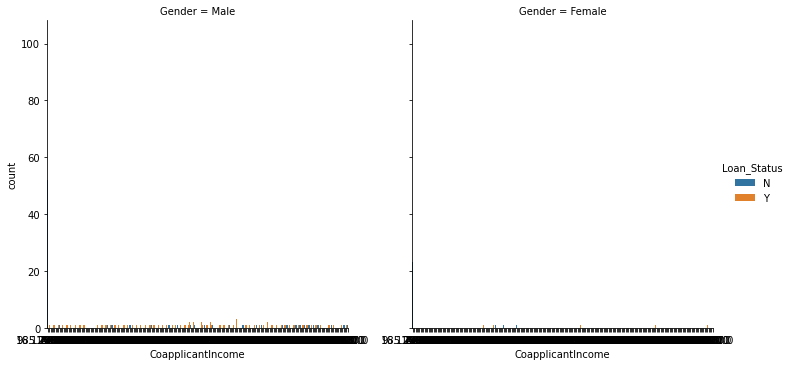

In [19]:
sns.catplot(x='CoapplicantIncome', data= data, kind='count',hue= 'Loan_Status',col= 'Gender')
plt.show()

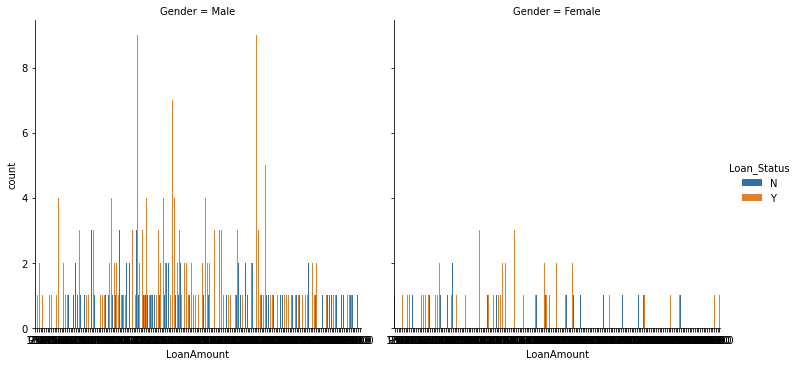

In [20]:
sns.catplot(x='LoanAmount', data= data, kind='count',hue= 'Loan_Status',col= 'Gender')
plt.show()

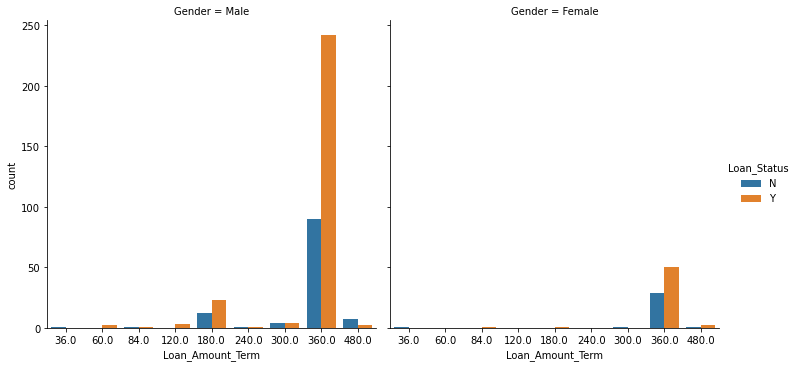

In [21]:
sns.catplot(x='Loan_Amount_Term', data= data, kind='count',hue= 'Loan_Status',col= 'Gender')
plt.show()

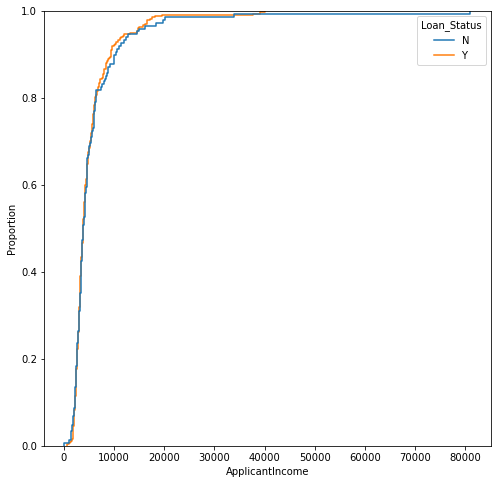

In [22]:
plt.figure(figsize=(8,8))
sns.ecdfplot(x='ApplicantIncome', data= data, hue= 'Loan_Status')
plt.show()

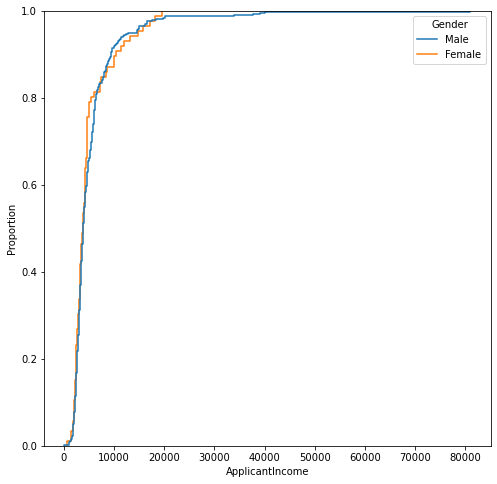

In [24]:
plt.figure(figsize=(8,8))
sns.ecdfplot(x='ApplicantIncome', data= data, hue= 'Gender')
plt.show()

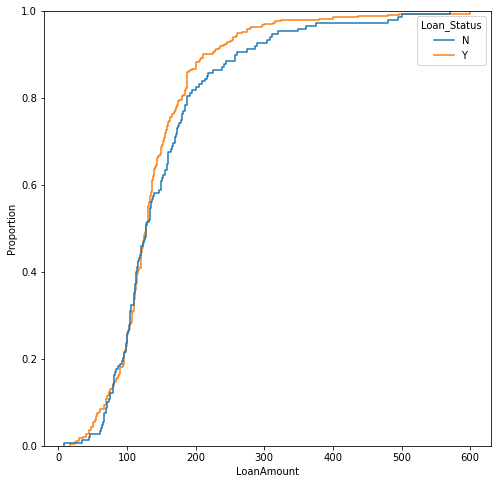

In [25]:
plt.figure(figsize=(8,8))
sns.ecdfplot(x='LoanAmount', data= data, hue= 'Loan_Status')
plt.show()

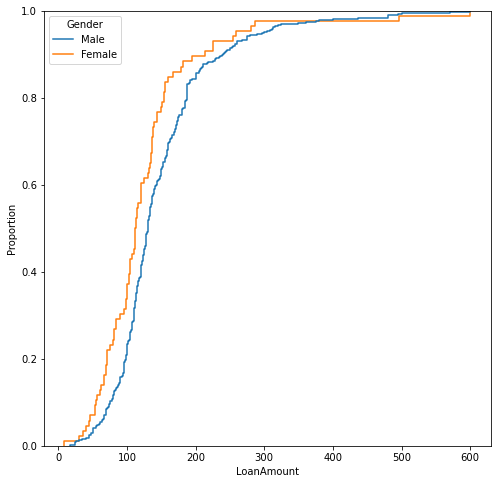

In [26]:
plt.figure(figsize=(8,8))
sns.ecdfplot(x='LoanAmount', data= data, hue= 'Gender')
plt.show()

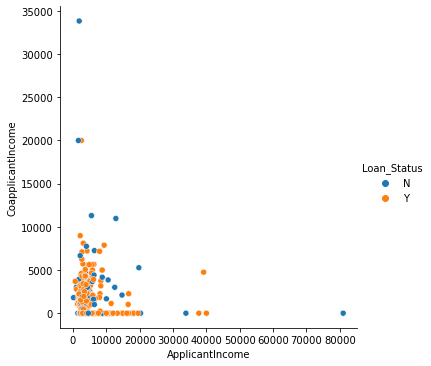

In [27]:
sns.relplot(x='ApplicantIncome',y='CoapplicantIncome',hue='Loan_Status',data=data)
plt.show()

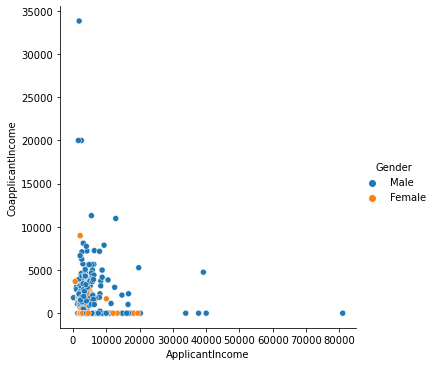

In [28]:
sns.relplot(x='ApplicantIncome',y='CoapplicantIncome',hue='Gender',data=data)
plt.show()

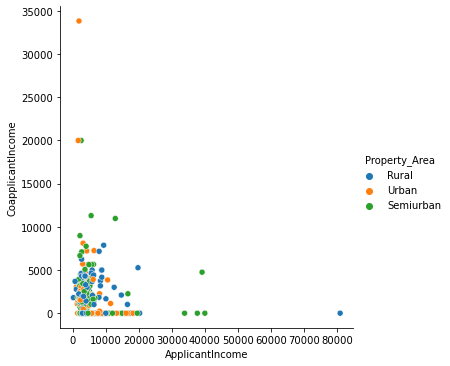

In [29]:
sns.relplot(x='ApplicantIncome',y='CoapplicantIncome',hue='Property_Area',data=data)
plt.show()

<AxesSubplot:>

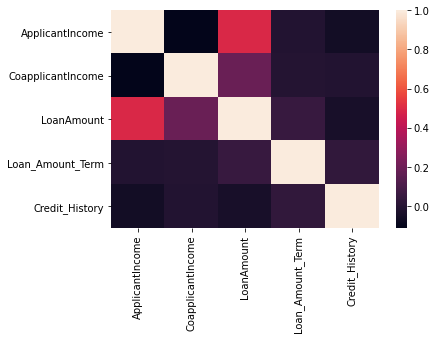

In [31]:
corr=data.corr()
sns.heatmap(corr)

In [ ]:
## LoanAmount has some relationship with ApplicantIncome.

In [32]:
data['CoapplicantIncome'] = data.CoapplicantIncome.round(0).astype('int64')
data['LoanAmount'] = data.LoanAmount.round(0).astype('int64')
data['Loan_Amount_Term'] = data.Loan_Amount_Term.round(0).astype('int64')

In [33]:
data['Credit_History'] = data.Credit_History.round(0).astype('int64')

In [34]:
data['Property_Area'] = data.Property_Area.astype('category').cat.codes

In [35]:
data['Self_Employed'] = data.Self_Employed.astype('category').cat.codes
data['Education'] = data.Education.astype('category').cat.codes
data['Gender'] = data.Gender.astype('category').cat.codes
data['Married'] = data.Married.astype('category').cat.codes

In [36]:
data["Dependents"].replace("3+",4,inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            480 non-null    object
 1   Gender             480 non-null    int8  
 2   Married            480 non-null    int8  
 3   Dependents         480 non-null    object
 4   Education          480 non-null    int8  
 5   Self_Employed      480 non-null    int8  
 6   ApplicantIncome    480 non-null    int64 
 7   CoapplicantIncome  480 non-null    int64 
 8   LoanAmount         480 non-null    int64 
 9   Loan_Amount_Term   480 non-null    int64 
 10  Credit_History     480 non-null    int64 
 11  Property_Area      480 non-null    int8  
 12  Loan_Status        480 non-null    object
dtypes: int64(5), int8(5), object(3)
memory usage: 56.1+ KB


In [38]:
data.Dependents.value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [39]:
data['Dependents'] = data.Dependents.astype('int64')
data['Loan_Status'] = data.Loan_Status.astype('category').cat.codes

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            480 non-null    object
 1   Gender             480 non-null    int8  
 2   Married            480 non-null    int8  
 3   Dependents         480 non-null    int64 
 4   Education          480 non-null    int8  
 5   Self_Employed      480 non-null    int8  
 6   ApplicantIncome    480 non-null    int64 
 7   CoapplicantIncome  480 non-null    int64 
 8   LoanAmount         480 non-null    int64 
 9   Loan_Amount_Term   480 non-null    int64 
 10  Credit_History     480 non-null    int64 
 11  Property_Area      480 non-null    int8  
 12  Loan_Status        480 non-null    int8  
dtypes: int64(6), int8(6), object(1)
memory usage: 52.8+ KB


In [41]:
data= data.drop(columns='Loan_ID')

In [42]:
data= data.astype('int64')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             480 non-null    int64
 1   Married            480 non-null    int64
 2   Dependents         480 non-null    int64
 3   Education          480 non-null    int64
 4   Self_Employed      480 non-null    int64
 5   ApplicantIncome    480 non-null    int64
 6   CoapplicantIncome  480 non-null    int64
 7   LoanAmount         480 non-null    int64
 8   Loan_Amount_Term   480 non-null    int64
 9   Credit_History     480 non-null    int64
 10  Property_Area      480 non-null    int64
 11  Loan_Status        480 non-null    int64
dtypes: int64(12)
memory usage: 68.8 KB


<AxesSubplot:>

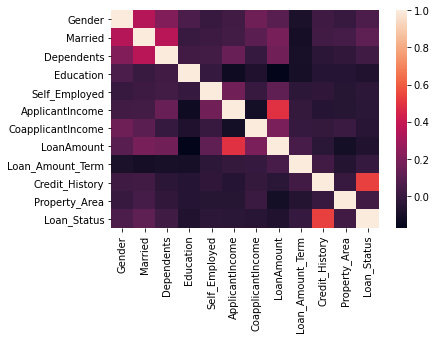

In [44]:
corr_features= data.corr()
sns.heatmap(corr_features)

In [45]:
## credit_history is co-related to Loan_Status. Married feature has relationship with dependents and gender.

In [46]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.862500,0.202083,0.137500,5364.231250,1581.093750,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.225107,0.401973,0.344734,5668.251251,2617.692322,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [49]:
import sklearn

In [53]:
# spliting training and testing data
from sklearn.model_selection import train_test_split

X = data.drop(columns= 'Loan_Status')
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

In [61]:

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
x_train_norm = norm.transform(X_train)

# transform testing dataabs
x_test_norm = norm.transform(X_test)

In [55]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.862500,0.202083,0.137500,5364.231250,1581.093750,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.225107,0.401973,0.344734,5668.251251,2617.692322,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [57]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [66]:
logit= LogisticRegression()
logit.fit(x_train_norm,y_train)
predict_logit= logit.predict(x_test_norm)
logit_train_accuracy= round(logit.score(x_train_norm,y_train)*100)
logit_test_accuracy= round(accuracy_score(predict_logit,y_test)*100)

In [67]:
print("logit_train_accuracy : {}%".format(logit_train_accuracy))
print("logit_test_accuracy : {}%".format(logit_test_accuracy))


logit_train_accuracy : 82%
logit_test_accuracy : 77%


In [68]:
sgd= SGDClassifier()
sgd.fit(x_train_norm,y_train)
predict_sgd= sgd.predict(x_test_norm)
sgd_train_accuracy= round(sgd.score(x_train_norm,y_train)*100)
sgd_test_accuracy= round(accuracy_score(predict_sgd,y_test)*100)

In [69]:
print("sgd_train_accuracy : {}%".format(sgd_train_accuracy))
print("sgd_test_accuracy : {}%".format(sgd_test_accuracy))


sgd_train_accuracy : 83%
sgd_test_accuracy : 77%


In [70]:
knn= KNeighborsClassifier(n_neighbors=5, metric= 'euclidean')
knn.fit(x_train_norm,y_train)
predict_knn= knn.predict(x_test_norm)
knn_train_accuracy= round(knn.score(x_train_norm,y_train)*100)
knn_test_accuracy= round(accuracy_score(predict_knn,y_test)*100)

In [71]:
print("knn_train_accuracy : {}%".format(knn_train_accuracy))
print("knn_test_accuracy : {}%".format(knn_test_accuracy))


knn_train_accuracy : 82%
knn_test_accuracy : 75%


In [74]:
## It seems that our model is not performing well with normalised dataset. we need to investigate the causes and
#build the best model.


In [75]:
# Watch Noetebook2 for this.